# Basic KNN model Structure


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns=["Outcome"])
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=10)

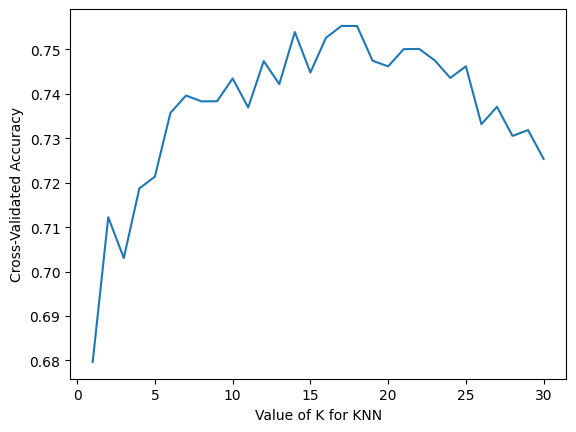

In [9]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the range of n_neighbors to test
k_range = range(1, 31)
k_scores = []

# Perform 10-fold cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the results
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [16]:
knn.predict(X_test)
# 0 mean patient does not have diabiaties and 1 mean patient have diabiaties

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
knn.score(X_test, y_test)


0.6753246753246753

# solve problem of overfitting/underfitting


In [18]:
train_acc = {}
test_acc = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_acc[neighbor] = knn.score(X_train, y_train)
    test_acc[neighbor] = knn.score(X_test, y_test)

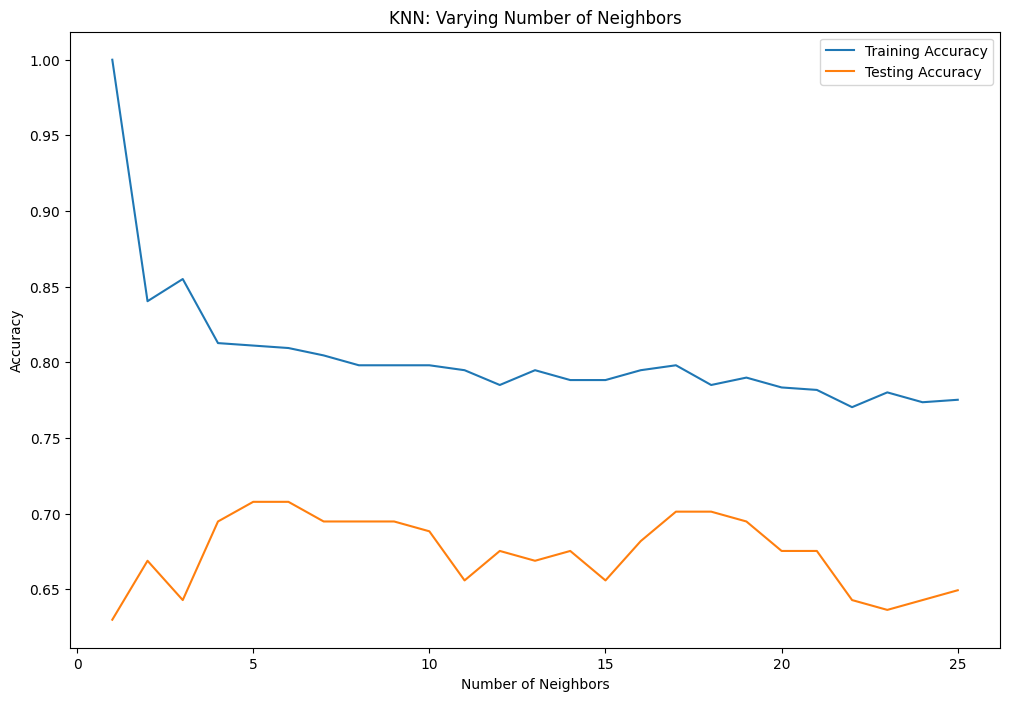

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, test_acc.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision
precision = TP / (TP + FP)

Recall
recall = TP / (TP + FN)

F1-score
f1-score = 2 * (precision * recall) / (precision + recall)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Confusion metrix: \n", confusion_matrix(y_test, y_pred))
print("\n Classification report: \n", classification_report(y_test, y_pred))

Confusion metrix: 
 [[83 12]
 [38 21]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.87      0.77        95
           1       0.64      0.36      0.46        59

    accuracy                           0.68       154
   macro avg       0.66      0.61      0.61       154
weighted avg       0.67      0.68      0.65       154

